### Linear Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

home_prices = {
    "area":np.array([2600,3000,3200,3600,4000]),
    "price":np.array([550000,565000,610000,680000,725000]),
}

In [ ]:
home_prices

{'area': array([2600, 3000, 3200, 3600, 4000]),
 'price': array([550000, 565000, 610000, 680000, 725000])}

In [ ]:
df = pd.DataFrame(home_prices)
print(df)


   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


In [ ]:
df.to_csv('area',index=False)
my_data = pd.read_csv('area')
print(my_data)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


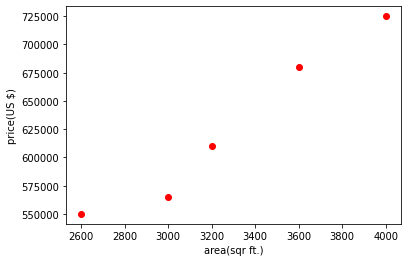

In [ ]:
%matplotlib inline
plt.scatter(df.area,df.price,color = 'red')
plt.xlabel('area(sqr ft.)')
plt.ylabel('price(US $)')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
new_areas = {"area":np.array([1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]),}

In [ ]:
new_df = pd.DataFrame(new_areas)
print(new_df)

    area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100


In [ ]:
new_df.to_csv('new_areas',index = False)
my_newData = pd.read_csv('new_areas')
print(my_newData)

    area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100


In [ ]:
p = reg.predict(my_newData)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
my_newData['prices']=p
my_newData

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
my_newData.to_csv('prediction.csv')

###Multivariate Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
Multi_home_prices = {"area": np.array([2600,3000,3200,3600,4000,4100]),
               "bedrooms": np.array([3,4,0,3,5,6]),
               "age": np.array([20,15,18,30,8,8]),
               "price": np.array([550000,565000,610000,595000,760000,810000])}

In [ ]:
df = pd.DataFrame(Multi_home_prices)
print(df)

   area  bedrooms  age   price
0  2600         3   20  550000
1  3000         4   15  565000
2  3200         0   18  610000
3  3600         3   30  595000
4  4000         5    8  760000
5  4100         6    8  810000


In [ ]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [ ]:
#df.bedrooms.fill
df.loc[2,'bedrooms'] = median_bedrooms

In [ ]:
print(df)

   area  bedrooms  age   price
0  2600         3   20  550000
1  3000         4   15  565000
2  3200         3   18  610000
3  3600         3   30  595000
4  4000         5    8  760000
5  4100         6    8  810000


In [ ]:
df.to_csv("Multi_home_prices",index = False)
my_multi_Data = pd.read_csv('Multi_home_prices')
print(my_multi_Data)

   area  bedrooms  age   price
0  2600         3   20  550000
1  3000         4   15  565000
2  3200         3   18  610000
3  3600         3   30  595000
4  4000         5    8  760000
5  4100         6    8  810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  119.67905405, 13097.24903475, -4207.28764479])

In [ ]:
reg.intercept_

256461.14864864858

###Gradient Decent and Cost Function

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

test_gradientDecet = {
    "name":['david' ,'laura', 'sanjay', 'wei', 'jeff', 'aamir', 'venkat', 'virat', 'arthur', 'paul'],
    "math": np.array([92,56,88,70,80,49,65,35,66,67]),
    "cs": np.array([98,68,81,80,83,52,66,30,68,73])
}

df_test = pd.DataFrame(test_gradientDecet)


def gradient_decent(x,y):
  #here m_curr is thetha1 & b_curr is thetha0
  m_curr = b_curr = 0
  iterations = 1000000
  n = len(x)
  learning_rate = 0.0002
  cost_previous = 0

  for i in range(iterations):
    y_predicted = m_curr * x + b_curr
    cost = (1/n) * sum([j**2 for j in (y - y_predicted)])
    m_derivative = -(2/n) * sum(x * (y - y_predicted))
    b_derivative = -(2/n) * sum((y - y_predicted))
    m_curr = m_curr - learning_rate * m_derivative
    b_curr = b_curr - learning_rate * b_derivative
    if math.isclose(cost, cost_previous, rel_tol=1e-20):
        break
    cost_previous = cost
    print("m= {}, b= {}, cost= {}, iteration= {}".format(m_curr,b_curr,cost,i))

    #math.isclose()
    
x = np.array(df_test.math)
y = np.array(df_test.cs)

gradient_decent(x,y)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

test_gradientDecet = {
    "name":['david' ,'laura', 'sanjay', 'wei', 'jeff', 'aamir', 'venkat', 'virat', 'arthur', 'paul'],
    "math": np.array([92,56,88,70,80,49,65,35,66,67]),
    "cs": np.array([98,68,81,80,83,52,66,30,68,73])
}

df_test = pd.DataFrame(test_gradientDecet)

def predict_using_sklean():
    r = LinearRegression()
    r.fit(df_test[['math']],df_test.cs)
    return r.coef_, r.intercept_

predict_using_sklean()


(array([1.01773624]), 1.9152193111569034)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

def predict_using_sklean():
    r = LinearRegression()
    r.fit(df_test[['math']],df_test.cs)
    return r.coef_, r.intercept_

def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 100000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":

    test_gradientDecet = {
    "name":['david' ,'laura', 'sanjay', 'wei', 'jeff', 'aamir', 'venkat', 'virat', 'arthur', 'paul'],
    "math": np.array([92,56,88,70,80,49,65,35,66,67]),
    "cs": np.array([98,68,81,80,83,52,66,30,68,73])
      }

    df_test = pd.DataFrame(test_gradientDecet)

    x = np.array(df_test.math)
    y = np.array(df_test.cs)

    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

In [ ]:
import numpy as np
import pandas as pd

test_gradientDecet = {
    "name":['david' ,'laura', 'sanjay', 'wei', 'jeff', 'aamir', 'venkat', 'virat', 'arthur', 'paul'],
    "math": np.array([92,56,88,70,80,49,65,35,66,67]),
    "cs": np.array([98,68,81,80,83,52,66,30,68,73])
}

In [ ]:
df_test = pd.DataFrame(test_gradientDecet)
print(df_test) 

df_test.to_csv('test_scores',index = False)


     name  math  cs
0   david    92  98
1   laura    56  68
2  sanjay    88  81
3     wei    70  80
4    jeff    80  83
5   aamir    49  52
6  venkat    65  66
7   virat    35  30
8  arthur    66  68
9    paul    67  73


###Hot encoding


In [ ]:
import numpy as np
import pandas as pd

home_prices = {
    "area":np.array([2600,3000,3200,3600,4000,2600,2800,3300,3600,2600,2900,3100,3600]),
    "prices": np.array([550000,565000,610000,680000,725000,585000,615000,650000,710000,575000,600000,620000,695000])
}
df = pd.DataFrame(home_prices)
print(df)

    area  prices
0   2600  550000
1   3000  565000
2   3200  610000
3   3600  680000
4   4000  725000
5   2600  585000
6   2800  615000
7   3300  650000
8   3600  710000
9   2600  575000
10  2900  600000
11  3100  620000
12  3600  695000


In [ ]:
#df.insert(0,"town",['monroe township','monroe township','monroe township','monroe township','monroe township','west windsor','west windsor','west windsor','west windsor','robinsville','robinsville','robinsville','robinsville'],True)
f = pd.DataFrame({"town":['monroe township','monroe township','monroe township','monroe township','monroe township','west windsor','west windsor','west windsor','west windsor','robinsville','robinsville','robinsville','robinsville']})
print(f)

               town
0   monroe township
1   monroe township
2   monroe township
3   monroe township
4   monroe township
5      west windsor
6      west windsor
7      west windsor
8      west windsor
9       robinsville
10      robinsville
11      robinsville
12      robinsville


In [ ]:
merged1 = pd.concat([f,df],axis = 'columns')

print(merged1)

               town  area  prices
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000


In [ ]:
merged1.to_csv("hot_encoding_home_prices",index = False)
my_hot_encoding_Data = pd.read_csv("hot_encoding_home_prices")
print(my_hot_encoding_Data)

               town  area  prices
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000


In [ ]:
dummies = pd.get_dummies(merged1.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
merged2 = pd.concat([my_hot_encoding_Data,dummies],axis = 'columns')
merged2

,town,area,prices,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [ ]:
final = merged2.drop(['town'],axis = 'columns')
final

,area,prices,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [ ]:
final = final.drop(['west windsor'], axis = 'columns')
final

,area,prices,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
X = final.drop(['prices'],axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [ ]:
Y = final.prices

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [ ]:
model.score(X,Y)

0.9573929037221873

In [ ]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([681241.66845839])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = my_hot_encoding_Data
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,prices
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
Y = dfle.prices.values
Y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')


In [ ]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
model.predict([[0,1,3400]])

array([681241.6684584])

###Logistic Regression

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("HR_comma_sep.CSV")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


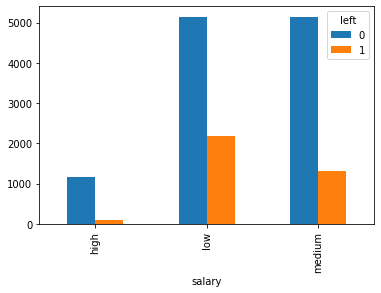

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

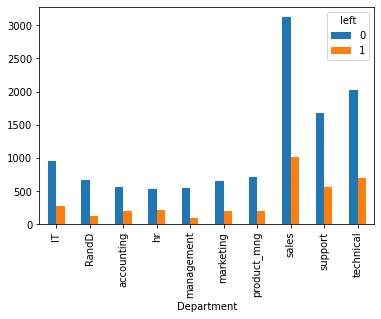

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = "salary")
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
Y = df.left

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test,Y_test)

0.7745714285714286

###Logistic Regression multiclass classification iris

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample_data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
Y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.3,random_state = 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor

In [ ]:
model.score(X_test,Y_test)

0.9428571428571428

###Decision Tree

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
X = df.drop('salary_more_then_100k',axis = 'columns')
Y = df['salary_more_then_100k']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])

In [ ]:
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
X_n = X.drop(['company','job','degree'],axis = 'columns')
X_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
Y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

use ".values" to avoid warning "X does not have valid feature names"

In [ ]:
model.fit(X_n.values,Y.values)

DecisionTreeClassifier()

In [ ]:
model.score(X_n.values,Y.values)

1.0

In [ ]:
model.predict([[2,1,1]])

array([1])

###Decision Tree Exercise

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns')
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
Y = df['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
X['Sex_n'] = le.fit_transform(X['Sex'])

In [ ]:
X.head()

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [ ]:
X_n = X.drop('Sex',axis = 'columns')
X_n.head()

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [ ]:
X_n.Age = X_n.Age.fillna(X_n.Age.mean())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n,Y,test_size=0.2)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,y_test)

0.7486033519553073

### Support Vector Machine

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train.values, y_train.values)

SVC()

In [ ]:
model.score(X_test.values, y_test.values)

1.0

In [ ]:
model.predict([[7.0,	3.2,	4.7,	1.4]])

array([1])

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.8333333333333334

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

###SVM Exercise

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 432x288 with 0 Axes>

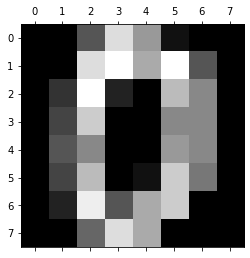

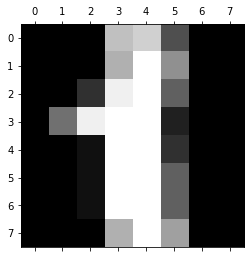

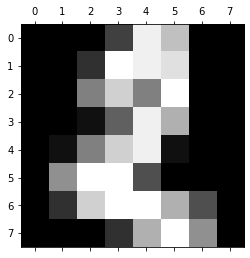

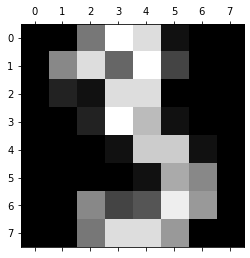

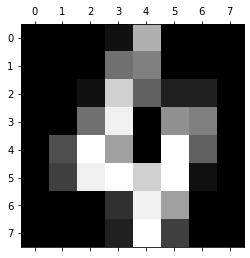

In [ ]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
rbf_model = SVC(kernel = 'rbf')

In [ ]:
rbf_model.fit(X_train,y_train)

SVC()

In [ ]:
rbf_model.score(X_test,y_test)

0.9861111111111112

In [ ]:
linear_model = SVC(kernel = 'linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
linear_model.score(X_test,y_test)

0.9777777777777777

### Random Forest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

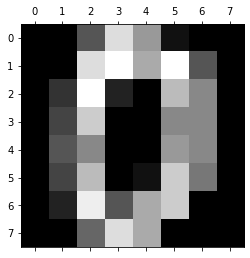

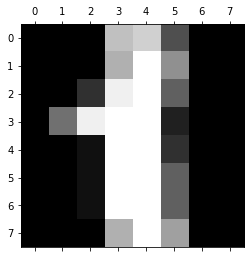

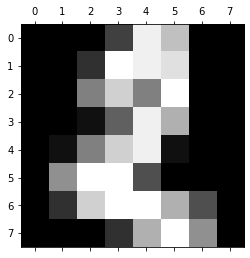

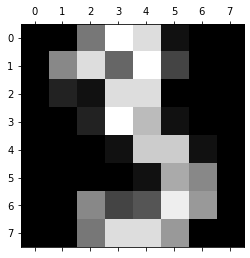

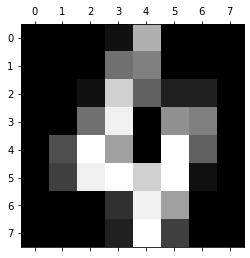

In [ ]:
plt.gray
for i in range(5):
  plt.matshow(digits.images[i])

In [ ]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
y = pd.DataFrame(digits.target)
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,train_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9742698191933241

### Random Forest Exercise

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = pd.DataFrame(iris.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,train_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=40)

In [ ]:
model.score(X_test,y_test)

0.9583333333333334

###KFold

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,train_size = 0.3)

In [ ]:
lr = LogisticRegression(solver = 'liblinear',multi_class = 'ovr')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9372019077901431

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9610492845786963

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9411764705882353

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=4)

array([0.93777778, 0.91091314, 0.95768374, 0.90423163])

In [ ]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=4)

array([0.40888889, 0.40534521, 0.43207127, 0.50556793])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=4)

array([0.93111111, 0.89532294, 0.96213808, 0.91759465])

In [ ]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8814680322780882

In [ ]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=10),digits.data, digits.target, cv=10)
np.average(scores2)

0.908187461204221

In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores3)

0.9393513345747981

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=50),digits.data, digits.target, cv=10)
np.average(scores4)

0.9504748603351955

##K Means clusterring

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

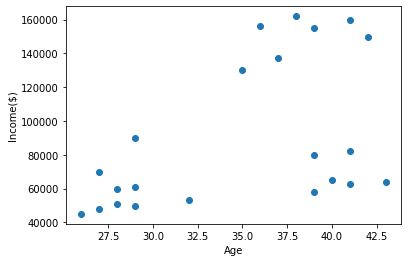

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

####Pre processing using MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


Text(0, 0.5, 'Income($)')

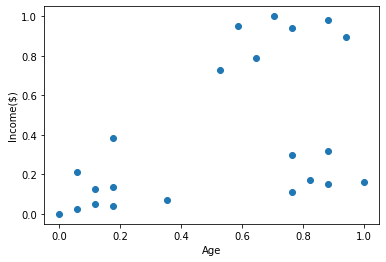

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

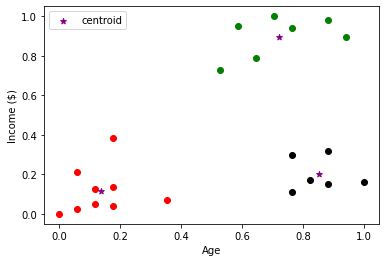

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
km.inertia_

0.10629897421405131

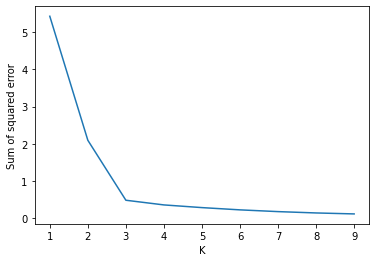

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

##KMeans clusterring exercise

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

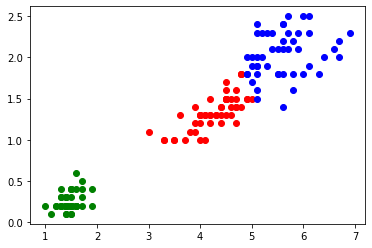

In [ ]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

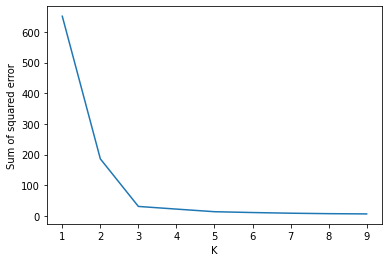

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#Naive Bayes : Predicting survival from titanic crash

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns',inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [ ]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [ ]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.7798507462686567

In [ ]:
X_test[0:10]

,Pclass,Age,Fare,female
269,1,35.0,135.6333,1
54,1,65.0,61.9792,0
371,3,18.0,6.4958,0
88,1,23.0,263.0000,1
271,3,25.0,0.0000,0
536,1,45.0,26.5500,0
651,2,18.0,23.0000,1
258,1,35.0,512.3292,1
871,1,47.0,52.5542,1
631,3,51.0,7.0542,0


In [ ]:
y_test[0:10]

269    1
54     0
371    0
88     1
271    1
536    0
651    1
258    1
871    1
631    0
Name: Survived, dtype: int64

In [ ]:
model.predict(X_test[0:10])

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
model.predict_proba(X_test[:10])

array([[7.61322487e-04, 9.99238678e-01],
       [6.35917763e-01, 3.64082237e-01],
       [9.52567865e-01, 4.74321351e-02],
       [1.17460260e-10, 1.00000000e+00],
       [9.56313826e-01, 4.36861737e-02],
       [8.02224808e-01, 1.97775192e-01],
       [1.90586681e-01, 8.09413319e-01],
       [3.03841938e-37, 1.00000000e+00],
       [5.86480853e-02, 9.41351915e-01],
       [9.64303779e-01, 3.56962207e-02]])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=4)

array([0.76923077, 0.78846154, 0.80128205, 0.76129032])

#Naive bayes email spam

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df.drop('Category',axis = 'columns',inplace = True)
df.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.spam)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [ ]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9834888729361091

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(X_test,y_test)

0.9834888729361091

In [ ]:
clf.predict(emails)

array([0, 1])

#Finding best model and hyper parameter tunning using GridSearchCV

In [ ]:
from sklearn import svm,datasets
iris = datasets.load_iris()
import pandas as pd

In [ ]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Use train_test_split and manually tune parameters by trial and error

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.3)

In [ ]:
model = svm.SVC(kernel = 'rbf',C = 30, gamma = 'auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9555555555555556

### Use KFold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [ ]:
cross_val_score(svm.SVC(kernel = 'rbf',C = 10,gamma = 'auto'), iris.data, iris.target, cv = 5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

alternative of above process using for loop

In [ ]:
kernels = ['linear','rbf']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
  for cval in C:
    cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
    avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668}

GridSearchCV does exactly same thing as for loop above but in a single line of code

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma = 'auto'),{
    'C': [1,10,20],
    'kernel': ['linear','rbf']
    }, cv = 5,return_train_score = False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00309854, 0.00204096, 0.00137739, 0.00147328, 0.00117612,
        0.00153146]),
 'mean_score_time': array([0.00342846, 0.00092354, 0.00075274, 0.00073633, 0.00217938,
        0.00452433]),
 'mean_test_score': array([0.98      , 0.98      , 0.97333333, 0.98      , 0.96666667,
        0.96666667]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'}],
 'rank_test_score': array([1, 1, 4, 1, 6, 5], dtype=int32),
 'split0_test_score': array([0.96666667, 0.96

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003099,0.001938,0.003428,0.002621,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.002041,0.000493,0.000924,0.000088,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001377,0.000158,0.000753,0.000123,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
3,0.001473,0.000074,0.000736,0.000039,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.001176,0.000013,0.002179,0.003045,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6
5,0.001531,0.000084,0.004524,0.004921,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [ ]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,1,rbf,0.980000
2,10,linear,0.973333
3,10,rbf,0.980000
4,20,linear,0.966667
5,20,rbf,0.966667


In [ ]:
clf.best_score_

0.9800000000000001

Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma = 'auto'),{
    'C': [1,10,20],
    'kernel':['rbf','linear']
}, cv = 5,return_train_score = False, n_iter = 2)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.98
1,1,rbf,0.98


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores

[{'best_params': {'C': 1, 'kernel': 'rbf'},
  'best_score': 0.9800000000000001,
  'model': 'svm'},
 {'best_params': {'n_estimators': 5},
  'best_score': 0.9666666666666668,
  'model': 'random_forest'},
 {'best_params': {'C': 5},
  'best_score': 0.9666666666666668,
  'model': 'logistic_regression'}]

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}
